In [6]:
import numpy as np
import pandas as pd

import yfinance as yf

import tensorflow as tf

import datetime as dt
 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

In [22]:
start = dt.datetime(2015,1,1)
today = dt.datetime(2021,12,31)
def load_data(ticker):
    data = yf.download(ticker, start, today)
    data.reset_index(inplace=True)
    return data

In [23]:
df = load_data('MSFT')

[*********************100%***********************]  1 of 1 completed


In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00-05:00,46.660000,47.419998,46.540001,46.759998,40.926445,27913900
1,2015-01-05 00:00:00-05:00,46.369999,46.730000,46.250000,46.330002,40.550091,39673900
2,2015-01-06 00:00:00-05:00,46.380001,46.750000,45.540001,45.650002,39.954918,36447900
3,2015-01-07 00:00:00-05:00,45.980000,46.459999,45.490002,46.230000,40.462563,29114100
4,2015-01-08 00:00:00-05:00,46.750000,47.750000,46.720001,47.590000,41.652897,29645200


In [20]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1736,2021-11-23 00:00:00-05:00,337.049988,339.450012,333.559998,337.679993,335.488068,30427600
1737,2021-11-24 00:00:00-05:00,336.279999,338.160004,333.910004,337.910004,335.716583,21661300
1738,2021-11-26 00:00:00-05:00,334.350006,337.929993,328.119995,329.679993,327.539978,24217200
1739,2021-11-29 00:00:00-05:00,334.940002,339.029999,334.739990,336.630005,334.444885,28563500
1740,2021-11-30 00:00:00-05:00,335.320007,337.779999,328.989990,330.589996,328.444092,42885600


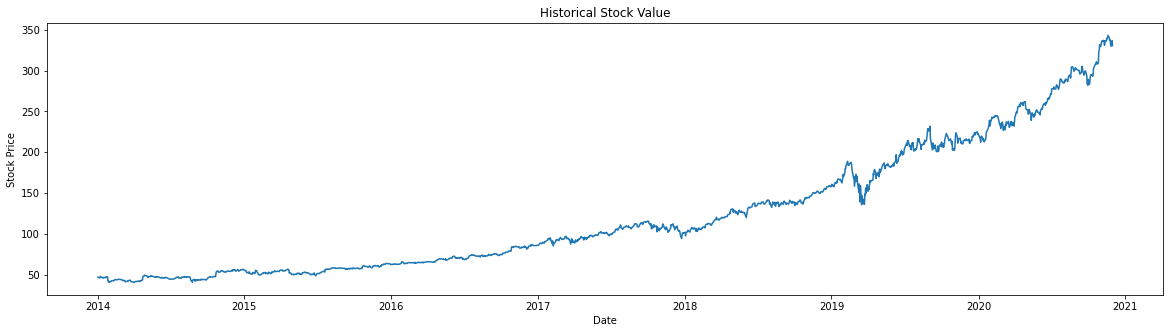

In [21]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'],df['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [25]:
data = df.copy()

In [26]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02 00:00:00-05:00,46.660000,47.419998,46.540001,46.759998,40.926445,27913900
1,2015-01-05 00:00:00-05:00,46.369999,46.730000,46.250000,46.330002,40.550091,39673900
2,2015-01-06 00:00:00-05:00,46.380001,46.750000,45.540001,45.650002,39.954918,36447900
3,2015-01-07 00:00:00-05:00,45.980000,46.459999,45.490002,46.230000,40.462563,29114100
4,2015-01-08 00:00:00-05:00,46.750000,47.750000,46.720001,47.590000,41.652897,29645200


In [28]:
data.shape

(1762, 7)

In [33]:
temp_set = df[['Date','Close']]
training_set = temp_set.iloc[:1500,1:2].values
test_set = temp_set.iloc[1500:,1:2].values

In [34]:
training_set

array([[ 46.75999832],
       [ 46.33000183],
       [ 45.65000153],
       ...,
       [213.25999451],
       [214.19999695],
       [214.13000488]])

In [35]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 1500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [37]:
!nvidia-smi

Wed Oct 12 06:51:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    286MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 11s 15ms/step - loss: 0.0160
Epoch 2/50
45/45 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 3/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 4/50
45/45 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 5/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 6/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 7/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 8/50
45/45 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 9/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 10/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 11/50
45/45 [==============================] - 1s 12ms/step - loss: 0.0020
Epoch 12/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 13/50
45/45 [=================

In [39]:
testdataframe= yf.download('MSFT',dt.datetime(2021,1,1),dt.date.today())
testdataframe.reset_index(inplace=True)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata[['Date','Close']]
dataset_total = pd.concat((data['Close'], testdata['Close']), axis = 0)

[*********************100%***********************]  1 of 1 completed


In [43]:
dataset_total.shape

(2209,)

In [42]:
real_stock_price.shape

(447, 2)

In [44]:
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 447):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
predicted = model.predict(X_test)
predicted = sc.inverse_transform(predicted)
predicted

array([[289.33167],
       [288.16183],
       [284.18088],
       [277.60825],
       [269.26483],
       [260.10968],
       [250.99413],
       [242.56787],
       [235.31403],
       [229.4521 ],
       [225.01727],
       [221.97906],
       [220.33641],
       [219.95105],
       [220.56879],
       [221.92923],
       [223.78557],
       [225.88264],
       [228.10043],
       [230.15475],
       [231.99449],
       [233.58667],
       [234.97755],
       [236.16313],
       [237.13031],
       [237.87503],
       [238.4303 ],
       [238.8052 ],
       [239.05074],
       [239.2179 ],
       [239.31076],
       [239.3435 ],
       [239.32112],
       [239.19429],
       [238.8163 ],
       [238.1231 ],
       [237.18338],
       [236.00177],
       [234.71501],
       [233.55754],
       [232.61876],
       [231.79494],
       [230.99327],
       [230.27956],
       [229.62817],
       [229.16028],
       [228.91393],
       [228.97388],
       [229.31287],
       [229.82938],


In [50]:
real_stock_price

,Date,Close
0,0,217.690002
1,1,217.899994
2,2,212.250000
3,3,218.289993
4,4,219.619995
...,...,...
442,442,249.199997
443,443,246.789993
444,444,234.240005
445,445,229.250000


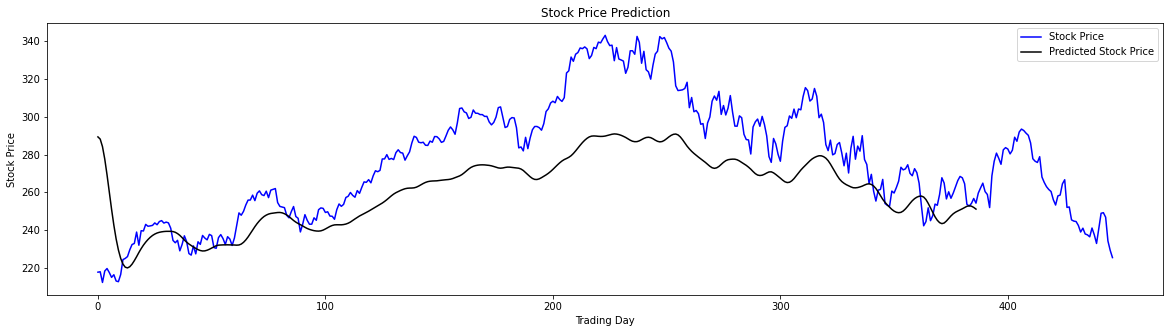

In [54]:
plt.figure(figsize=(20,5))
plt.plot(real_stock_price['Close'], color = 'blue', label = 'Stock Price')
plt.plot(predicted, color = 'black', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()